<a href="https://colab.research.google.com/github/Emboava2022/Desafio-C-digo-Python/blob/main/Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_excel('/content/drive/MyDrive/datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/datasets/Salvador.xlsx')

In [5]:
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    7
LojaID    0
Qtde      0
dtype: int64

In [7]:
df['Vendas'].fillna(0, inplace=True)

In [8]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [9]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,0.00,1522,6,0.00
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,0.00,1522,8,0.00


In [10]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [11]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,0.00,1522,6,0.00,NaN
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,0.00,1522,8,0.00,NaN


In [12]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48388.67
Fortaleza     37876.48
Natal        163915.52
Recife        51859.86
Salvador      40557.44
Name: Receita, dtype: float64

In [13]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0
70,Natal,2019-02-14,743.0,854,4,2972.0,4.0


In [14]:
df.groupby('Data')['Receita'].sum()

Data
2018-01-01    46145.19
2018-01-05     1546.00
2018-01-10     2655.00
2018-01-11     1518.00
2018-01-15      738.00
                ...   
2019-03-30     2760.00
2019-03-31      564.00
2019-04-01     4554.00
2019-04-02     1128.00
2019-04-05      584.00
Name: Receita, Length: 76, dtype: float64

***Trabalhando com datas***

In [15]:
#Transformando a coluna de data em tipo inteito 
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [16]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [17]:
# Transformando a coluna de data em datetime
df['Data'] = pd.to_datetime(df['Data'])

In [18]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [19]:
# Agrupando por ano / dt.year -> está dizendo (vá até a minha coluna data e extraia apenas o ano)
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    114583.19
2019    228014.78
Name: Receita, dtype: float64

In [20]:
# Criando uma nova coluna com o ano 
df['Ano_Venda'] = df['Data'].dt.year

In [21]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
62,Salvador,2019-01-01,161.02,1037,3,483.06,3.0,2019


In [22]:
# Extraindo o mês e o dia 
df['mês_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)  

In [23]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mês_venda,dia_venda
206,Natal,2019-01-02,151.45,1036,2,302.90,2.0,2019,1,2
83,Recife,2019-01-01,143.61,983,6,861.66,6.0,2019,1,1
68,Salvador,2019-01-01,162.35,1037,3,487.05,3.0,2019,1,1
103,Salvador,2019-01-01,191.60,1034,1,191.60,1.0,2019,1,1
96,Natal,2019-01-02,42.94,1034,3,128.82,3.0,2019,1,2


In [24]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [25]:
# Calculando a diferença de dias 
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [26]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mês_venda,dia_venda,diferenca_dias
77,Aracaju,2018-01-01,24.10,1522,1,24.10,1.0,2018,1,1,0 days
27,Fortaleza,2019-01-01,212.37,1003,6,1274.22,6.0,2019,1,1,365 days
81,Aracaju,2018-01-01,53.41,1520,2,106.82,2.0,2018,1,1,0 days
86,Recife,2019-01-01,17.83,982,8,142.64,8.0,2019,1,1,365 days
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,1.0,2019,1,1,365 days


In [27]:
# Criando a coluna trimestre
df['trimestre_Venda'] = df['Data'].dt.quarter

In [28]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mês_venda,dia_venda,diferenca_dias,trimestre_Venda
103,Aracaju,2018-01-01,12.62,1522,3,37.86,3.0,2018,1,1,0 days,1


In [29]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [30]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mês_venda,dia_venda,diferenca_dias,trimestre_Venda
124,Fortaleza,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days,1
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,4.0,2019,3,27,450 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019,3,11,434 days,1
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days,1


***Visualização de dados ***


In [31]:
# Conta a quantidade de linhas - ou seja, neste caso de vendas por loja 
df ['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

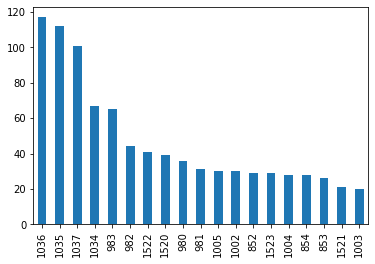

In [43]:
# Gráfico de barras verticais
# Ascending = False exibirá o valor do maior para o menor 
df['LojaID'].value_counts(ascending=False).plot.bar();

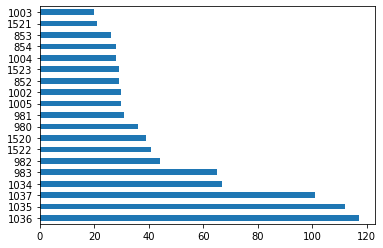

In [42]:
# Gráfico de barras horizontais - colocando no final do bar a letra h (horizontal)

df['LojaID'].value_counts().plot.barh();

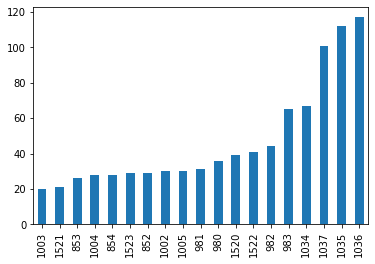

In [41]:
# Gráfico de barras horizontais 
# Ascending = True mostrará os valores do menor para o maior 
df['LojaID'].value_counts(ascending=True).plot.bar();

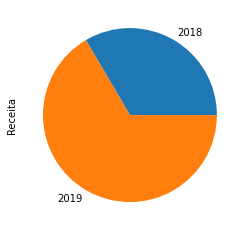

In [40]:
# Gráfico de Pizza 
# <matplotlib.axes._subplots.AxesSubplot at 0x7fe513cd9790> para não mostrar essa linha, só colocar (;)
# dt.year (solicita somente por ano / no caso de data completa)
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [39]:
# Total de vendas por cidade 
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

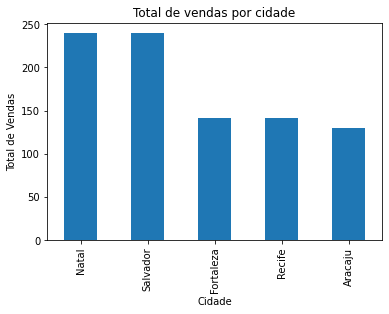

In [45]:
# Adicionando um título e alterando o nome dos eixos 
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

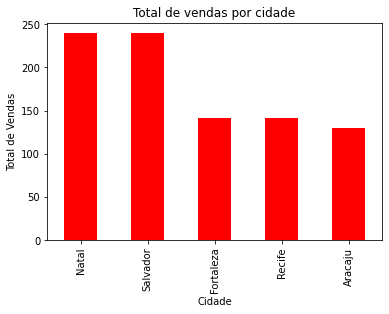

In [48]:
# Alterando a cor das barras do gráfico 
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade',color='red')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

In [49]:
# Alterando o estilo 
plt.style.use('ggplot')

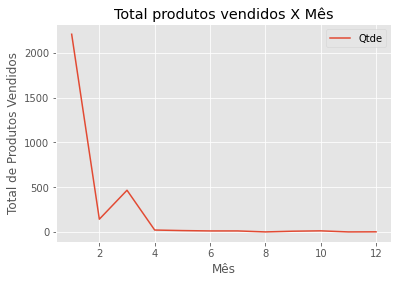

In [52]:
df.groupby(['mês_venda'])['Qtde'].sum().plot(title='Total produtos vendidos X Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos');
plt.legend();

In [53]:
df.groupby(df['mês_venda'])['Qtde'].sum()

mês_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [55]:
# Selecionando apenas as vendas de 2019
# Informando a coluna - todos os parâmetros ficam entre colchetes
df_2019 = df[df['Ano_Venda'] == 2019]

In [65]:
df_2019.groupby(df_2019['mês_venda'])['Qtde'].sum()

mês_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

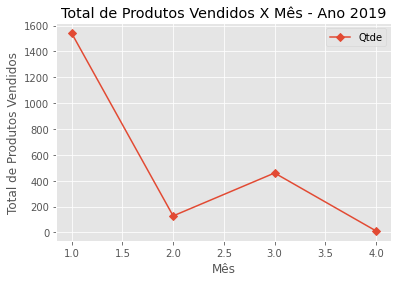

In [67]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019['mês_venda'])['Qtde'].sum().plot(marker='D', title='Total de Produtos Vendidos X Mês - Ano 2019')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

In [61]:
df_2018 = df[df['Ano_Venda']== 2018]

In [66]:
df_2018.groupby(df_2018['mês_venda'])['Qtde'].sum()

mês_venda
1     667
2      16
3       7
4      11
5      17
6      13
7      13
8       2
9      10
10     14
11      2
12      3
Name: Qtde, dtype: int64

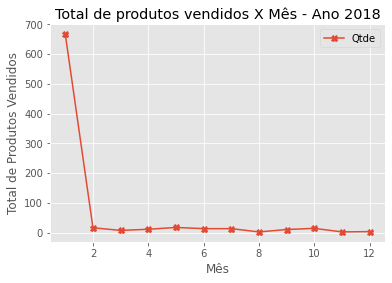

In [68]:
df_2018.groupby(df_2018['mês_venda'])['Qtde'].sum().plot(marker='X', title='Total de produtos vendidos X Mês - Ano 2018')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

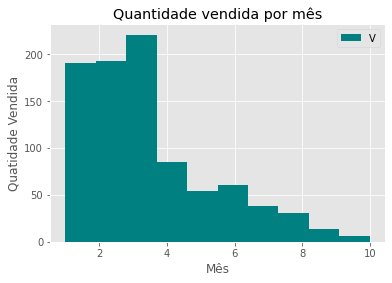

In [102]:
# Histograma
plt.hist(df['Qtde'],color = 'teal');
plt.title('Quantidade vendida por mês')
plt.xlabel('Mês')
plt.ylabel('Quatidade Vendida')
plt.legend('V');

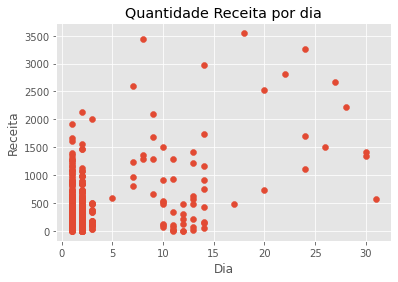

In [101]:
# Gráfico Scatter ( Conhecido como gráfico de dispersão)
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita'])
plt.xlabel('Dia')
plt.ylabel('Receita')
plt.title('Quantidade Receita por dia');

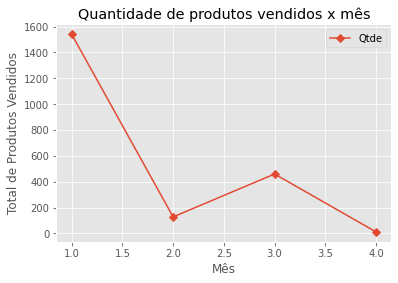

In [95]:
# Salvando em PNG
df_2019.groupby(df_2019['mês_venda'])['Qtde'].sum().plot(marker='D')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()
plt.savefig('Gráfico Quantidade X Mês.png')